In [67]:
import argparse
from ray.tune import Analysis
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
logdir = '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211/'
#logdir = '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/docking_2d/expr_20210910_213634'

In [69]:
all_subdirs = next(os.walk(logdir))[1]

In [70]:
all_subdirs

['PPO_DubinsRejoin_0920c_00004_4_seed=1862_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00005_5_seed=66342_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00002_2_seed=70972_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00009_9_seed=14743_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00000_0_seed=40578_2021-09-09_19-42-15',
 'training_logs',
 'PPO_DubinsRejoin_0920c_00001_1_seed=41411_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00003_3_seed=39321_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00008_8_seed=69688_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00006_6_seed=29558_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00007_7_seed=33790_2021-09-09_19-42-15']

In [71]:
# preprocessing logic 

# keep track of all csv files
csv_file_tracker = []
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        csv_file_tracker.append(csv_path)


In [72]:
csv_file_tracker

['/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00004_4_seed=1862_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00005_5_seed=66342_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00002_2_seed=70972_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00009_9_seed=14743_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00000_0_seed=40578_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00001_1_seed=41411_2021-09-09_19-42-15/progress.csv',

In [73]:
data_dfs = [pd.read_csv(csv_file_tracker[i]) for i in range(len(csv_file_tracker))]

In [74]:
data_dfs[0]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-5.612750,-7.609310,-6.336753,498.500000,4,6,4800,False,4,1,...,7.9,0.2,0.00005,0.050991,-0.013490,0.061610,0.096543,0.014355,3.205072,0.0
1,-4.238926,-11.350897,-6.870156,552.428571,10,6,9600,False,14,2,...,8.0,0.2,0.00005,0.001858,-0.018365,0.016194,0.059092,0.020150,3.193400,0.0
2,-4.238926,-11.350897,-7.086424,574.857143,7,6,14400,False,21,3,...,8.0,0.3,0.00005,-0.010336,-0.015273,0.001043,0.482162,0.012979,3.166509,0.0
3,-4.238926,-11.350897,-7.635164,632.115385,5,6,19200,False,26,4,...,8.0,0.3,0.00005,-0.024294,-0.030250,0.000398,0.660538,0.018525,3.119249,0.0
4,-4.238926,-11.350897,-8.086624,681.300000,4,6,24000,False,30,5,...,8.0,0.3,0.00005,-0.022795,-0.028597,0.000153,0.399877,0.018829,3.099231,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.898855,0.868836,2.216001,108.360000,46,6,940800,False,7458,196,...,8.0,0.3,0.00005,-0.005238,-0.028190,0.019635,0.965110,0.011055,1.653859,0.0
196,2.827167,0.868836,2.170551,113.150000,37,6,945600,False,7495,197,...,8.0,0.3,0.00005,-0.015029,-0.029098,0.011012,0.981737,0.010190,1.643331,0.0
197,2.844852,0.625845,2.115012,119.310000,41,6,950400,False,7536,198,...,8.0,0.3,0.00005,-0.009998,-0.030144,0.016531,0.975683,0.012049,1.610524,0.0
198,2.844852,0.625845,2.149121,115.840000,43,6,955200,False,7579,199,...,8.0,0.3,0.00005,-0.006580,-0.029347,0.019702,0.963161,0.010218,1.603113,0.0


In [75]:
data_dfs[0].iloc[0]


episode_reward_max                              -5.61275
episode_reward_min                              -7.60931
episode_reward_mean                            -6.336753
episode_len_mean                                   498.5
episodes_this_iter                                     4
                                                  ...   
info/learner/default_policy/vf_loss              0.06161
info/learner/default_policy/vf_explained_var    0.096543
info/learner/default_policy/kl                  0.014355
info/learner/default_policy/entropy             3.205072
info/learner/default_policy/entropy_coeff            0.0
Name: 0, Length: 81, dtype: object

In [76]:
data_dfs[0].iloc[0][3]

498.5

In [77]:
data_dfs[0].columns
# pos of time_step is 6
# pos of 

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'custom_metrics/outcome/success_mean',
       'custom_metrics/outcome/success_min',
       'custom_metrics/outcome/success_max',
       'custom_metrics/outcome/failure_mean',
       'custom_metrics/outcome/failure_min',
       'custom_metrics/outcome/failure_max',
       'custom_metrics/failure_code_ratio/timeout_mean',
       'custom_metrics/failure_code_ratio/timeout_min',
       'custom_metrics/failure_code_ratio/timeout_max',
       'custom_metrics/failure_code_ratio/distance_mean',
       'custom_metrics/failure_code_ratio/distance_min',
       'cu

In [78]:
data_dfs[0].iloc[[0]]['timesteps_total'][0]

4800

In [79]:
ds = data_dfs[0]
i = 0
val = ds.iloc[[5]]['episode_len_mean'][5]
val

669.475

In [80]:
# consume one df at a time
# fill up appropriate values 
key_timesteps = 'timesteps_total'
key_eps_len_mean = 'episode_len_mean'
key_success_mean = 'custom_metrics/outcome/success_mean'
key_eps_reward_mean = 'episode_reward_mean'


timesteps_total_track = []
episode_len_mean_track = []
success_mean_track = []
eps_reward_mean_track = []

for ds in data_dfs:  
    timestep_total = ds[key_timesteps]
    episode_len_mean = ds[key_eps_len_mean]
    success_mean = ds[key_success_mean]
    reward_mean = ds[key_eps_reward_mean]
    
    for i in timestep_total:
        timesteps_total_track.append(i)
    for i in episode_len_mean: 
        episode_len_mean_track.append(i)
    for i in success_mean: 
        success_mean_track.append(i)
    for i in reward_mean: 
        eps_reward_mean_track.append(i)






In [81]:
sns.set_theme()
sns.set(font_scale=1.5)
timesteps_total_v_episode_len_mean = pd.DataFrame()
timesteps_total_v_episode_len_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_episode_len_mean[key_eps_len_mean] = episode_len_mean_track

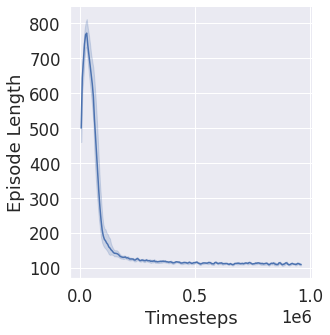

In [86]:
episode_mean_len_plot = sns.relplot(data=timesteps_total_v_episode_len_mean,x='timesteps_total',y='episode_len_mean',kind='line')
episode_mean_len_plot.set_axis_labels("Timesteps","Episode Length")


In [63]:
timesteps_total_v_success_mean = pd.DataFrame()
timesteps_total_v_success_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_success_mean['success_mean'] = success_mean_track

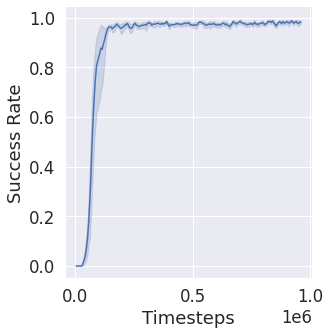

In [83]:
success_mean_plot = sns.relplot(data=timesteps_total_v_success_mean,x='timesteps_total',y='success_mean',kind='line')
success_mean_plot.set_axis_labels("Timesteps","Success Rate")

In [65]:
timesteps_total_v_episode_reward_mean = pd.DataFrame()
timesteps_total_v_episode_reward_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_episode_reward_mean['episode_reward_mean'] = eps_reward_mean_track


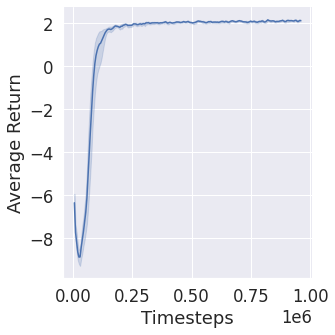

In [84]:
reward_plot = sns.relplot(data=timesteps_total_v_episode_reward_mean,x='timesteps_total',y='episode_reward_mean',kind='line')
reward_plot.set_axis_labels("Timesteps","Average Return") 

In [85]:
episode_mean_len_plot.savefig('rejoin2D_episode_len_graph.png',dpi=1200)
success_mean_plot.savefig('rejoin2D_success_rate_graph.png',dpi=1200)
reward_plot.savefig('rejoin2D_reward_graph.png',dpi=1200)